In [1]:
import pandas as pd

tp = pd.read_csv('~/Documentos/tomate/tablasLuisa/heterosis/paperLuisa/expancion2/CorrTodos/transcriptos_proteinas.csv')

p = tp.loc[: , ['Unicidad', 'spotID', 'Locus', 'ProteinFunctionDescription',
       'CervilCEMean', 'CervilORMean', 'LevovilxCervilCEMean',
       'LevovilxCervilORMean', 'LevovilCEMean', 'LevovilORMean', 'FerumCEMean',
       'FerumORMean', 'FerumxLA1420CEMean', 'FerumxLA1420ORMean',
       'LA1420CEMean', 'LA1420ORMean', 'PlovdivCEMean', 'PlovdivORMean',
       'LA0147xPlovdivCEMean', 'LA0147xPlovdivORMean', 'LA0147CEMean',
       'LA0147ORMean']]

t = tp.loc[: , ['Unicidad', 'spotID', 'Locus', 'ProteinFunctionDescription',
               'CervilMean', 'Levovil_x_CervilMean', 'LevovilMean',
       'FerumMean', 'LA1420_x_FerumMean', 'LA1420Mean', 'PlovdivMean',
       'LA0147_x_PlovdivMean', 'LA0147Mean']]

#additive (A) and dominance (D)
#[A = (P1-P2)/2]
#[D=H-((P1+P2)/2)]
#(D/A)
#(OR;D/A < -1.2), recessive (R; -1.2 ≤ D/A ≤ -0.8), additive (A; -0.8 < D/A < 0.8), 
#dominant (D; 0.8 ≤ D/A ≤ 1.2), or overdominant (OD; D/A > 1.2)

df1 = pd.DataFrame(columns = ['Unicidad' , 'spotID', 'Locus', 'ProteinFunctionDescription', 
'A_LxC' , 'D_LxC' , 'D/A_LxC' , 'A_FxLA1420' , 'D_FxLA1420' , 'D/A_FxLA1420' , 
'A_LA0147xP' , 'D_LA0147xP' , 'D/A_LA0147xP'])

df2 = pd.DataFrame(columns = ['Unicidad' , 'spotID', 'Locus', 'ProteinFunctionDescription', 
'A_LxC' , 'D_LxC' , 'D/A_LxC' , 'A_FxLA1420' , 'D_FxLA1420' , 'D/A_FxLA1420' , 
'A_LA0147xP' , 'D_LA0147xP' , 'D/A_LA0147xP'])

df3 = pd.DataFrame(columns = ['Unicidad' , 'spotID', 'Locus', 'ProteinFunctionDescription', 
'A_LxC' , 'D_LxC' , 'D/A_LxC' , 'A_FxLA1420' , 'D_FxLA1420' , 'D/A_FxLA1420' , 
'A_LA0147xP' , 'D_LA0147xP' , 'D/A_LA0147xP'])

###ahora relleno data redundante, pero util dentro de estos df numerados

df1['Unicidad'] = t['Unicidad']

df1['spotID'] = t['spotID']

df1['Locus'] = t['Locus']

df1['ProteinFunctionDescription'] = t['ProteinFunctionDescription']


#2
df2['Unicidad'] = t['Unicidad']

df2['spotID'] = t['spotID']

df2['Locus'] = t['Locus']

df2['ProteinFunctionDescription'] = t['ProteinFunctionDescription']

#3
df3['Unicidad'] = t['Unicidad']

df3['spotID'] = t['spotID']

df3['Locus'] = t['Locus']

df3['ProteinFunctionDescription'] = t['ProteinFunctionDescription']

##les ddoy nombre declarativo a los df

df_P_CE = df1

df_P_OR = df2

df_T = df3

print('p: ' ,p.shape ,'t: ', t.shape ,'her_P_CE: ', df_P_CE.shape ,'her_P_OR: ', df_P_OR.shape ,
      'her T: ',df_T.shape)

p:  (1279, 22) t:  (1279, 13) her_P_CE:  (1279, 13) her_P_OR:  (1279, 13) her T:  (1279, 13)


In [54]:
p.columns

Index(['Unicidad', 'spotID', 'Locus', 'ProteinFunctionDescription',
       'CervilCEMean', 'CervilORMean', 'LevovilxCervilCEMean',
       'LevovilxCervilORMean', 'LevovilCEMean', 'LevovilORMean', 'FerumCEMean',
       'FerumORMean', 'FerumxLA1420CEMean', 'FerumxLA1420ORMean',
       'LA1420CEMean', 'LA1420ORMean', 'PlovdivCEMean', 'PlovdivORMean',
       'LA0147xPlovdivCEMean', 'LA0147xPlovdivORMean', 'LA0147CEMean',
       'LA0147ORMean'],
      dtype='object')

In [55]:
t.columns

Index(['Unicidad', 'spotID', 'Locus', 'ProteinFunctionDescription',
       'CervilMean', 'Levovil_x_CervilMean', 'LevovilMean', 'FerumMean',
       'LA1420_x_FerumMean', 'LA1420Mean', 'PlovdivMean',
       'LA0147_x_PlovdivMean', 'LA0147Mean'],
      dtype='object')

In [2]:
#ahora queda hacer las cuentas para A D y D/A segun...

#additive (A) and dominance (D)
#[A = (P1-P2)/2]
#[D=H-((P1+P2)/2)]
#(D/A)
#(OR;D/A < -1.2), recessive (R; -1.2 ≤ D/A ≤ -0.8), additive (A; -0.8 < D/A < 0.8), 
#dominant (D; 0.8 ≤ D/A ≤ 1.2), or overdominant (OD; D/A > 1.2)

#para no tener conclictos con los signos, agrego a las columnas de aditividad todas positivas,
#esto lo logro usando df[A_genotipo].abs()

#para proteina los A

#A LxC

df_P_CE['A_LxC'] = ((p['LevovilCEMean']-p['CervilCEMean'])/2)

df_P_CE['A_LxC'] = df_P_CE['A_LxC'].abs()

df_P_OR['A_LxC'] = ((p['LevovilORMean']-p['CervilORMean'])/2)

df_P_OR['A_LxC'] = df_P_OR['A_LxC'].abs()

#A LA0147xP

df_P_CE['A_LA0147xP'] = ((p['LA0147CEMean']-p['PlovdivCEMean'])/2)

df_P_CE['A_LA0147xP'] = df_P_CE['A_LA0147xP'].abs()

df_P_OR['A_LA0147xP'] = ((p['LA0147ORMean']-p['PlovdivORMean'])/2)

df_P_OR['A_LA0147xP'] = df_P_OR['A_LA0147xP'].abs()

#A FxLA1420

df_P_CE['A_FxLA1420'] = ((p['FerumCEMean']-p['LA1420CEMean'])/2)

df_P_CE['A_FxLA1420'] = df_P_CE['A_FxLA1420'].abs()

df_P_OR['A_FxLA1420'] = ((p['FerumORMean']-p['LA1420ORMean'])/2)

df_P_OR['A_FxLA1420'] = df_P_OR['A_FxLA1420'].abs()

#para transcripto, los A

#A LxC

df_T['A_LxC'] = ((t['LevovilMean']-t['CervilMean'])/2)

df_T['A_LxC'] = df_T['A_LxC'].abs()

#A LA0147xP

df_T['A_LA0147xP'] = ((t['LA0147Mean']-t['PlovdivMean'])/2)

df_T['A_LA0147xP'] = df_T['A_LA0147xP'].abs()

#A FxLA1420

df_T['A_FxLA1420'] = ((t['FerumMean']-t['LA1420Mean'])/2)

df_T['A_FxLA1420'] = df_T['A_FxLA1420'].abs()

#ahora vienen los D

#D proteina

#D LxC

df_P_CE['D_LxC'] = (p['LevovilxCervilCEMean']-((p['LevovilCEMean']+p['CervilCEMean'])/2))

df_P_OR['D_LxC'] = (p['LevovilxCervilORMean']-((p['LevovilORMean']+p['CervilORMean'])/2))

#D LA0147xP

df_P_CE['D_LA0147xP'] = (p['LA0147xPlovdivCEMean']-((p['LA0147CEMean']+p['PlovdivCEMean'])/2))

df_P_OR['D_LA0147xP'] = (p['LA0147xPlovdivORMean']-((p['LA0147ORMean']+p['PlovdivORMean'])/2))

#D FxLA1420

df_P_CE['D_FxLA1420'] = (p['FerumxLA1420CEMean']-((p['FerumCEMean']+p['LA1420CEMean'])/2))

df_P_OR['D_FxLA1420'] = (p['FerumxLA1420ORMean']-((p['FerumORMean']+p['LA1420ORMean'])/2))

#para transcripto, los D

#D LxC

df_T['D_LxC'] = (t['Levovil_x_CervilMean']-((t['LevovilMean']+t['CervilMean'])/2))

#D LA0147xP

df_T['D_LA0147xP'] = (t['LA0147_x_PlovdivMean']-((t['LA0147Mean']+t['PlovdivMean'])/2))

#D FxLA1420

df_T['D_FxLA1420'] = (t['LA1420_x_FerumMean']-((t['FerumMean']+t['LA1420Mean'])/2))

###los D/A para cada df_genotipo

#para prot

df_P_CE['D/A_LxC'] = (df_P_CE['D_LxC']/df_P_CE['A_LxC'])

df_P_OR['D/A_LxC'] = (df_P_OR['D_LxC']/df_P_OR['A_LxC'])

df_P_CE['D/A_LA0147xP'] = (df_P_CE['D_LA0147xP']/df_P_CE['A_LA0147xP'])

df_P_OR['D/A_LA0147xP'] = (df_P_OR['D_LA0147xP']/df_P_OR['A_LA0147xP'])

df_P_CE['D/A_FxLA1420'] = (df_P_CE['D_FxLA1420']/df_P_CE['A_FxLA1420'])

df_P_OR['D/A_FxLA1420'] = (df_P_OR['D_FxLA1420']/df_P_OR['A_FxLA1420'])

#para trans

df_T['D/A_LxC'] = (df_T['D_LxC']/df_T['A_LxC'])

df_T['D/A_LA0147xP'] = (df_T['D_LA0147xP']/df_T['A_LA0147xP'])

df_T['D/A_FxLA1420'] = (df_T['D_FxLA1420']/df_T['A_FxLA1420'])

df_P_OR.head(20)

,Unicidad,spotID,Locus,ProteinFunctionDescription,A_LxC,D_LxC,D/A_LxC,A_FxLA1420,D_FxLA1420,D/A_FxLA1420,A_LA0147xP,D_LA0147xP,D/A_LA0147xP
0,0,JX036,Solyc07g049530,1-aminocyclopropane-1-carboxylate oxidase,0.35,0.85,2.428571,1.3,-0.1,-0.076923,2.90,-1.30,-0.448276
1,1,JX036,Solyc02g036350,1-aminocyclopropane-1-carboxylate oxidase,0.35,0.85,2.428571,1.3,-0.1,-0.076923,2.90,-1.30,-0.448276
2,2,JX036,Solyc02g081190,1-aminocyclopropane-1-carboxylate oxidase 4,0.35,0.85,2.428571,1.3,-0.1,-0.076923,2.90,-1.30,-0.448276
3,3,JX036,Solyc12g005940,1-aminocyclopropane-1-carboxylate oxidase,0.35,0.85,2.428571,1.3,-0.1,-0.076923,2.90,-1.30,-0.448276
4,4,JX036,Solyc07g049550,1-aminocyclopropane-1-carboxylate oxidase,0.35,0.85,2.428571,1.3,-0.1,-0.076923,2.90,-1.30,-0.448276
5,5,JX038,Solyc07g049530,1-aminocyclopropane-1-carboxylate oxidase,0.25,0.65,2.600000,0.1,0.0,0.000000,0.65,-0.65,-1.000000
6,6,JX038,Solyc02g036350,1-aminocyclopropane-1-carboxylate oxidase,0.25,0.65,2.600000,0.1,0.0,0.000000,0.65,-0.65,-1.000000
7,7,JX038,Solyc02g081190,1-aminocyclopropane-1-carboxylate oxidase 4,0.25,0.65,2.600000,0.1,0.0,0.000000,0.65,-0.65,-1.000000
8,8,JX038,Solyc12g005940,1-aminocyclopropane-1-carboxylate oxidase,0.25,0.65,2.600000,0.1,0.0,0.000000,0.65,-0.65,-1.000000
9,9,JX038,Solyc07g049550,1-aminocyclopropane-1-carboxylate oxidase,0.25,0.65,2.600000,0.1,0.0,0.000000,0.65,-0.65,-1.000000


In [57]:
df_T.isna().any()

Unicidad                      False
spotID                        False
Locus                         False
ProteinFunctionDescription    False
A_LxC                         False
D_LxC                         False
D/A_LxC                       False
A_FxLA1420                    False
D_FxLA1420                    False
D/A_FxLA1420                   True
A_LA0147xP                    False
D_LA0147xP                    False
D/A_LA0147xP                   True
dtype: bool

In [58]:
df_P_CE.isna().any()

Unicidad                      False
spotID                        False
Locus                         False
ProteinFunctionDescription    False
A_LxC                         False
D_LxC                         False
D/A_LxC                        True
A_FxLA1420                    False
D_FxLA1420                    False
D/A_FxLA1420                   True
A_LA0147xP                    False
D_LA0147xP                    False
D/A_LA0147xP                   True
dtype: bool

In [3]:
df_P_CE.to_csv('herencia_Proteina_CE_2.csv')

df_P_OR.to_csv('herencia_Proteina_OR_2.csv')

df_T.to_csv('herencia_Transcripto_2.csv')

In [60]:
df_P_CE.dropna().shape

(1010, 13)

In [61]:
df_P_OR.shape

(1279, 13)

In [62]:
#df_P_CE[df_P_CE.isna()]

,Unicidad,spotID,Locus,ProteinFunctionDescription,A_LxC,D_LxC,D/A_LxC,A_FxLA1420,D_FxLA1420,D/A_FxLA1420,A_LA0147xP,D_LA0147xP,D/A_LA0147xP
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
df_P_CE

,Unicidad,spotID,Locus,ProteinFunctionDescription,A_LxC,D_LxC,D/A_LxC,A_FxLA1420,D_FxLA1420,D/A_FxLA1420,A_LA0147xP,D_LA0147xP,D/A_LA0147xP
0,0,JX036,Solyc07g049530,1-aminocyclopropane-1-carboxylate oxidase,0.00,0.20,inf,0.10,0.00,0.000000,0.0,-0.1,-inf
1,1,JX036,Solyc02g036350,1-aminocyclopropane-1-carboxylate oxidase,0.00,0.20,inf,0.10,0.00,0.000000,0.0,-0.1,-inf
2,2,JX036,Solyc02g081190,1-aminocyclopropane-1-carboxylate oxidase 4,0.00,0.20,inf,0.10,0.00,0.000000,0.0,-0.1,-inf
3,3,JX036,Solyc12g005940,1-aminocyclopropane-1-carboxylate oxidase,0.00,0.20,inf,0.10,0.00,0.000000,0.0,-0.1,-inf
4,4,JX036,Solyc07g049550,1-aminocyclopropane-1-carboxylate oxidase,0.00,0.20,inf,0.10,0.00,0.000000,0.0,-0.1,-inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,1552,JX276,Solyc12g006380,2-oxoglutarate-dependent dioxygenase,0.05,-0.05,-1.0,-0.15,0.05,-0.333333,-0.1,0.0,-0.0
1275,1553,JX276,Solyc09g089740,1-aminocyclopropane-1-carboxylate oxidase-like...,0.05,-0.05,-1.0,-0.15,0.05,-0.333333,-0.1,0.0,-0.0
1276,1554,JX276,Solyc09g089690,1-aminocyclopropane-1-carboxylate oxidase-like...,0.05,-0.05,-1.0,-0.15,0.05,-0.333333,-0.1,0.0,-0.0
1277,1555,JX276,Solyc09g089730,1-aminocyclopropane-1-carboxylate oxidase-like...,0.05,-0.05,-1.0,-0.15,0.05,-0.333333,-0.1,0.0,-0.0


In [64]:
#continuo aca, cargando los archivos guardados, apra chequear unas cosas

In [65]:
import pandas as pd

p_CE = pd.read_csv('herencia_Proteina_CE_2.csv')

p_OR = pd.read_csv('herencia_Proteina_OR_2.csv')

t = pd.read_csv('herencia_Transcripto_2.csv')

print(p_CE.shape , p_OR.shape , t.shape)

(1279, 14) (1279, 14) (1279, 14)


In [66]:
import numpy as np

In [67]:
print(np.nan , np.inf)

nan inf


In [68]:
print(float('NaN') , float('inf'))

nan inf


In [69]:
p_CE.columns

Index(['Unnamed: 0', 'Unicidad', 'spotID', 'Locus',
       'ProteinFunctionDescription', 'A_LxC', 'D_LxC', 'D/A_LxC', 'A_FxLA1420',
       'D_FxLA1420', 'D/A_FxLA1420', 'A_LA0147xP', 'D_LA0147xP',
       'D/A_LA0147xP'],
      dtype='object')

In [70]:
p_CE[p_CE['D/A_LxC']=='inf'].shape

(0, 14)

In [71]:
p_CE[p_CE['D/A_LxC']=='NaN'].shape

(0, 14)

In [72]:
p_CE[p_CE['D/A_LxC']==np.nan].shape

(0, 14)

In [73]:
p_CE['D/A_LxC'].isna().any()

True

In [74]:
p_CE['D/A_LxC']

0       inf
1       inf
2       inf
3       inf
4       inf
       ... 
1274   -1.0
1275   -1.0
1276   -1.0
1277   -1.0
1278   -1.0
Name: D/A_LxC, Length: 1279, dtype: float64

In [75]:
p_CE[(p_CE['D/A_LxC']==float('inf'))].shape

(51, 14)

In [76]:
p_CE[(p_CE['D/A_LxC']==float('NaN'))].shape

(0, 14)

In [77]:
p_CE[(p_CE['D/A_LxC']==np.nan)].shape

(0, 14)

In [78]:
p_CE[(p_CE['D/A_LxC']!=float('inf'))].shape

(1228, 14)

In [79]:
p_CE[(p_CE['D/A_LxC']!=float('inf'))]['D/A_LxC']

5      -2.0
6      -2.0
7      -2.0
8      -2.0
9      -2.0
       ... 
1274   -1.0
1275   -1.0
1276   -1.0
1277   -1.0
1278   -1.0
Name: D/A_LxC, Length: 1228, dtype: float64

In [80]:
p_CE[(p_CE['D/A_LxC']!=float('inf'))]['D/A_LxC'].isna().any()

True

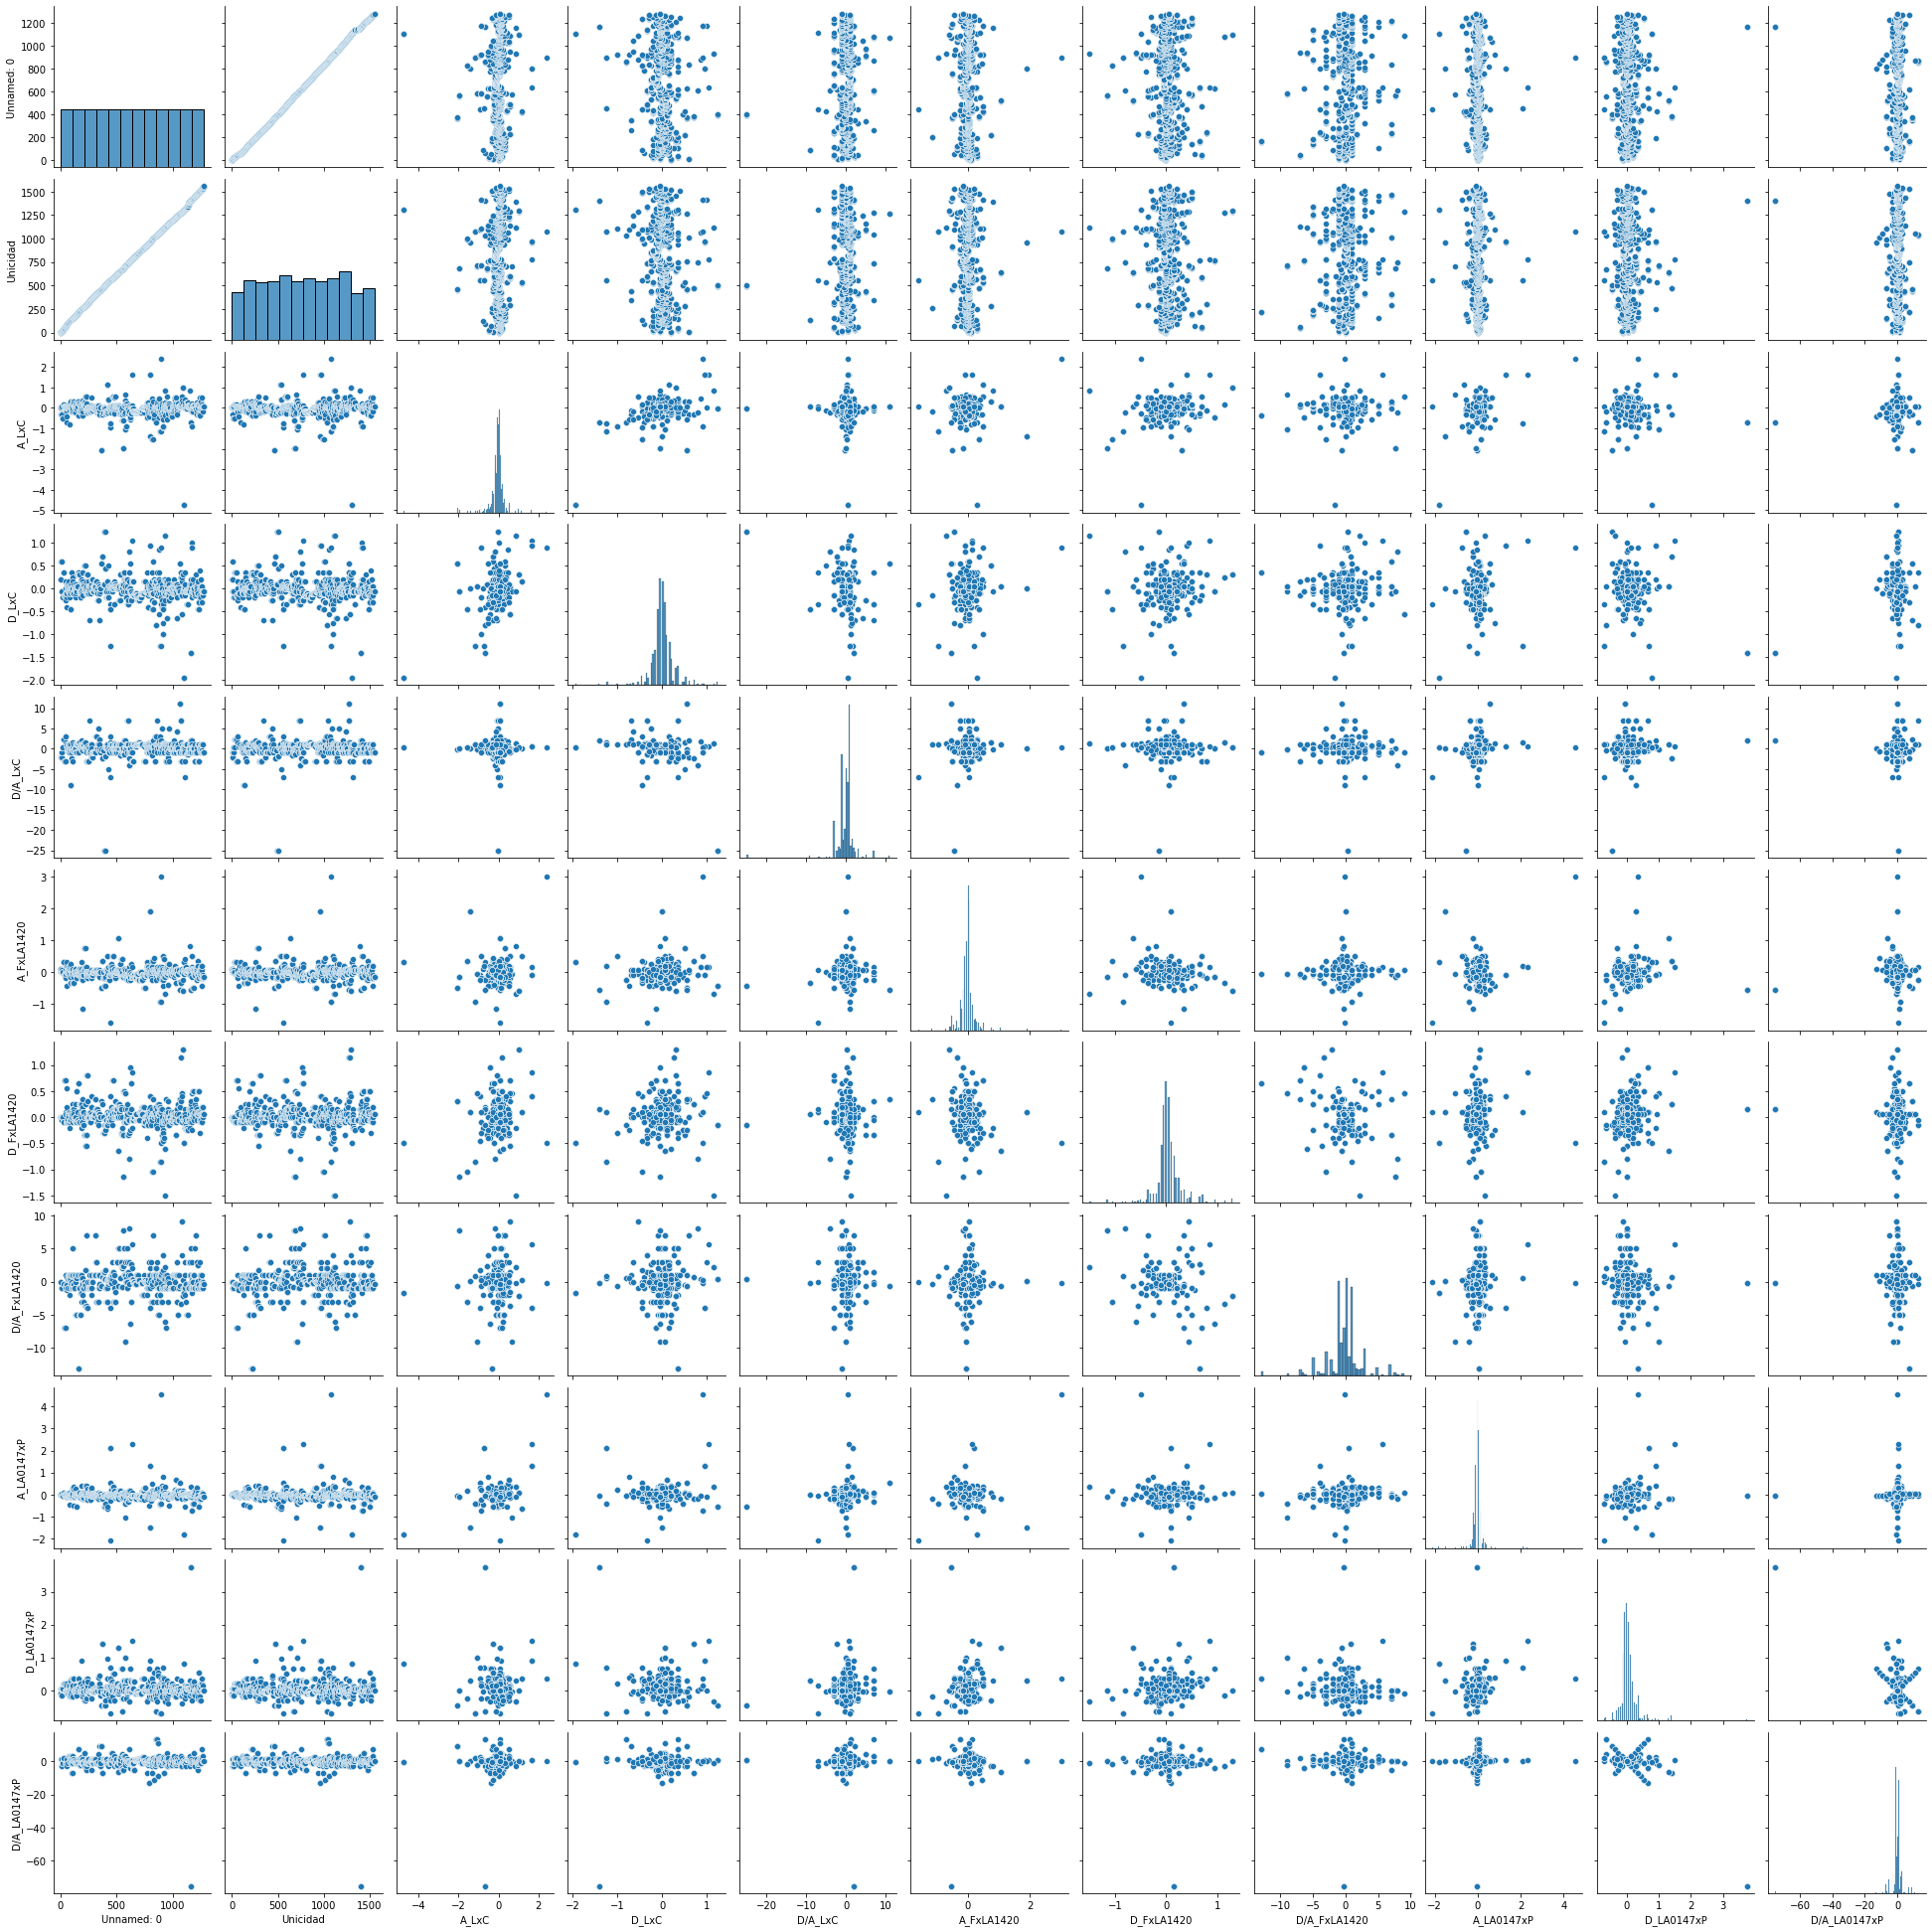

In [81]:
import seaborn as sns

sns.pairplot(p_CE)

In [82]:
p_CE['D/A_LxC'].quantile([0.1 , 0.25 , 0.5 , 0.75 , 0.95])

0.10   -2.333333
0.25   -1.000000
0.50    0.200000
0.75    1.000000
0.95    7.000000
Name: D/A_LxC, dtype: float64

In [83]:
p_CE['D/A_LA0147xP'].quantile([0.1 , 0.25 , 0.5 , 0.75 , 0.90])

0.10   -5.0
0.25   -1.0
0.50    0.0
0.75    1.0
0.90    5.0
Name: D/A_LA0147xP, dtype: float64

In [84]:
p_CE['D/A_FxLA1420'].quantile([0.1 , 0.25 , 0.5 , 0.75 , 0.9])

0.10   -3.628571
0.25   -1.000000
0.50   -0.000000
0.75    1.000000
0.90    7.000000
Name: D/A_FxLA1420, dtype: float64

In [85]:
p_OR['D/A_LxC'].quantile([0.1 , 0.25 , 0.5 , 0.75 , 0.95])

0.10   -5.000000
0.25   -1.000000
0.50   -0.333333
0.75    1.000000
0.95    9.000000
Name: D/A_LxC, dtype: float64

In [86]:
p_OR['D/A_LA0147xP'].quantile([0.1 , 0.25 , 0.5 , 0.75 , 0.90])

0.10   -2.6
0.25   -1.0
0.50    0.2
0.75    1.0
0.90    3.0
Name: D/A_LA0147xP, dtype: float64

In [87]:
p_OR['D/A_FxLA1420'].quantile([0.1 , 0.25 , 0.5 , 0.75 , 0.9])

0.10   -3.0
0.25   -1.0
0.50    0.0
0.75    1.0
0.90    3.0
Name: D/A_FxLA1420, dtype: float64

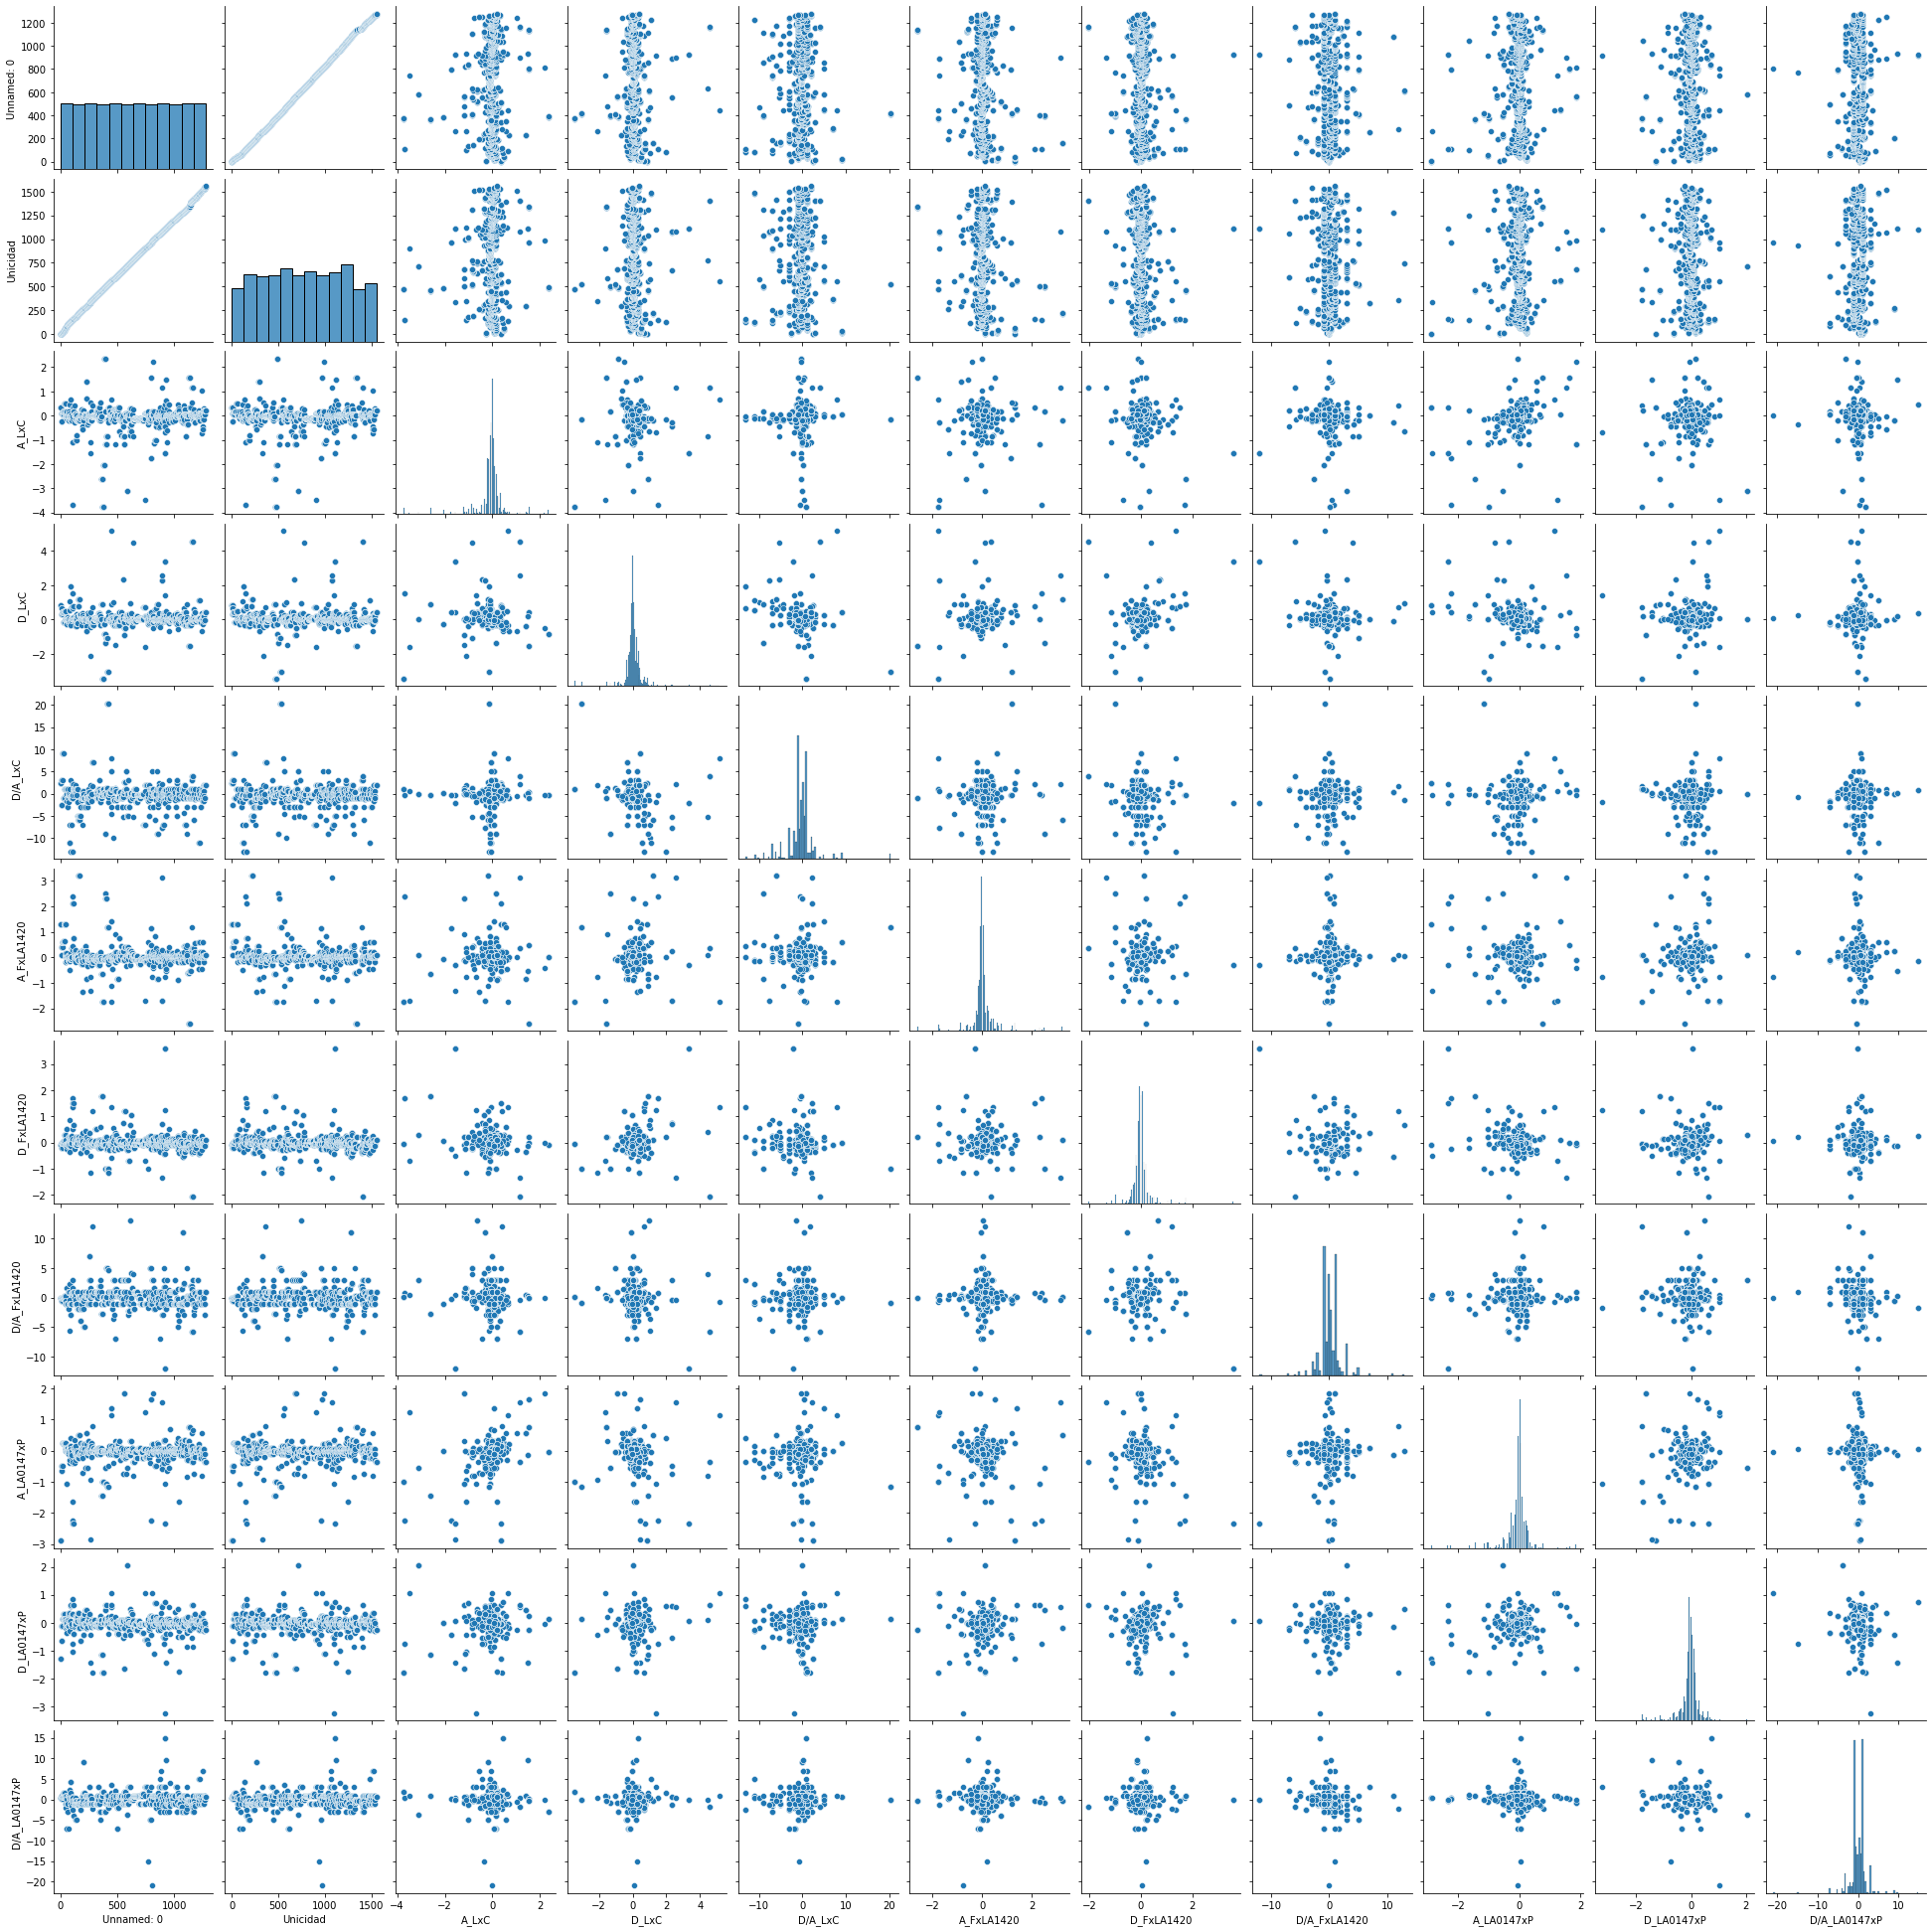

In [88]:
sns.pairplot(p_OR)

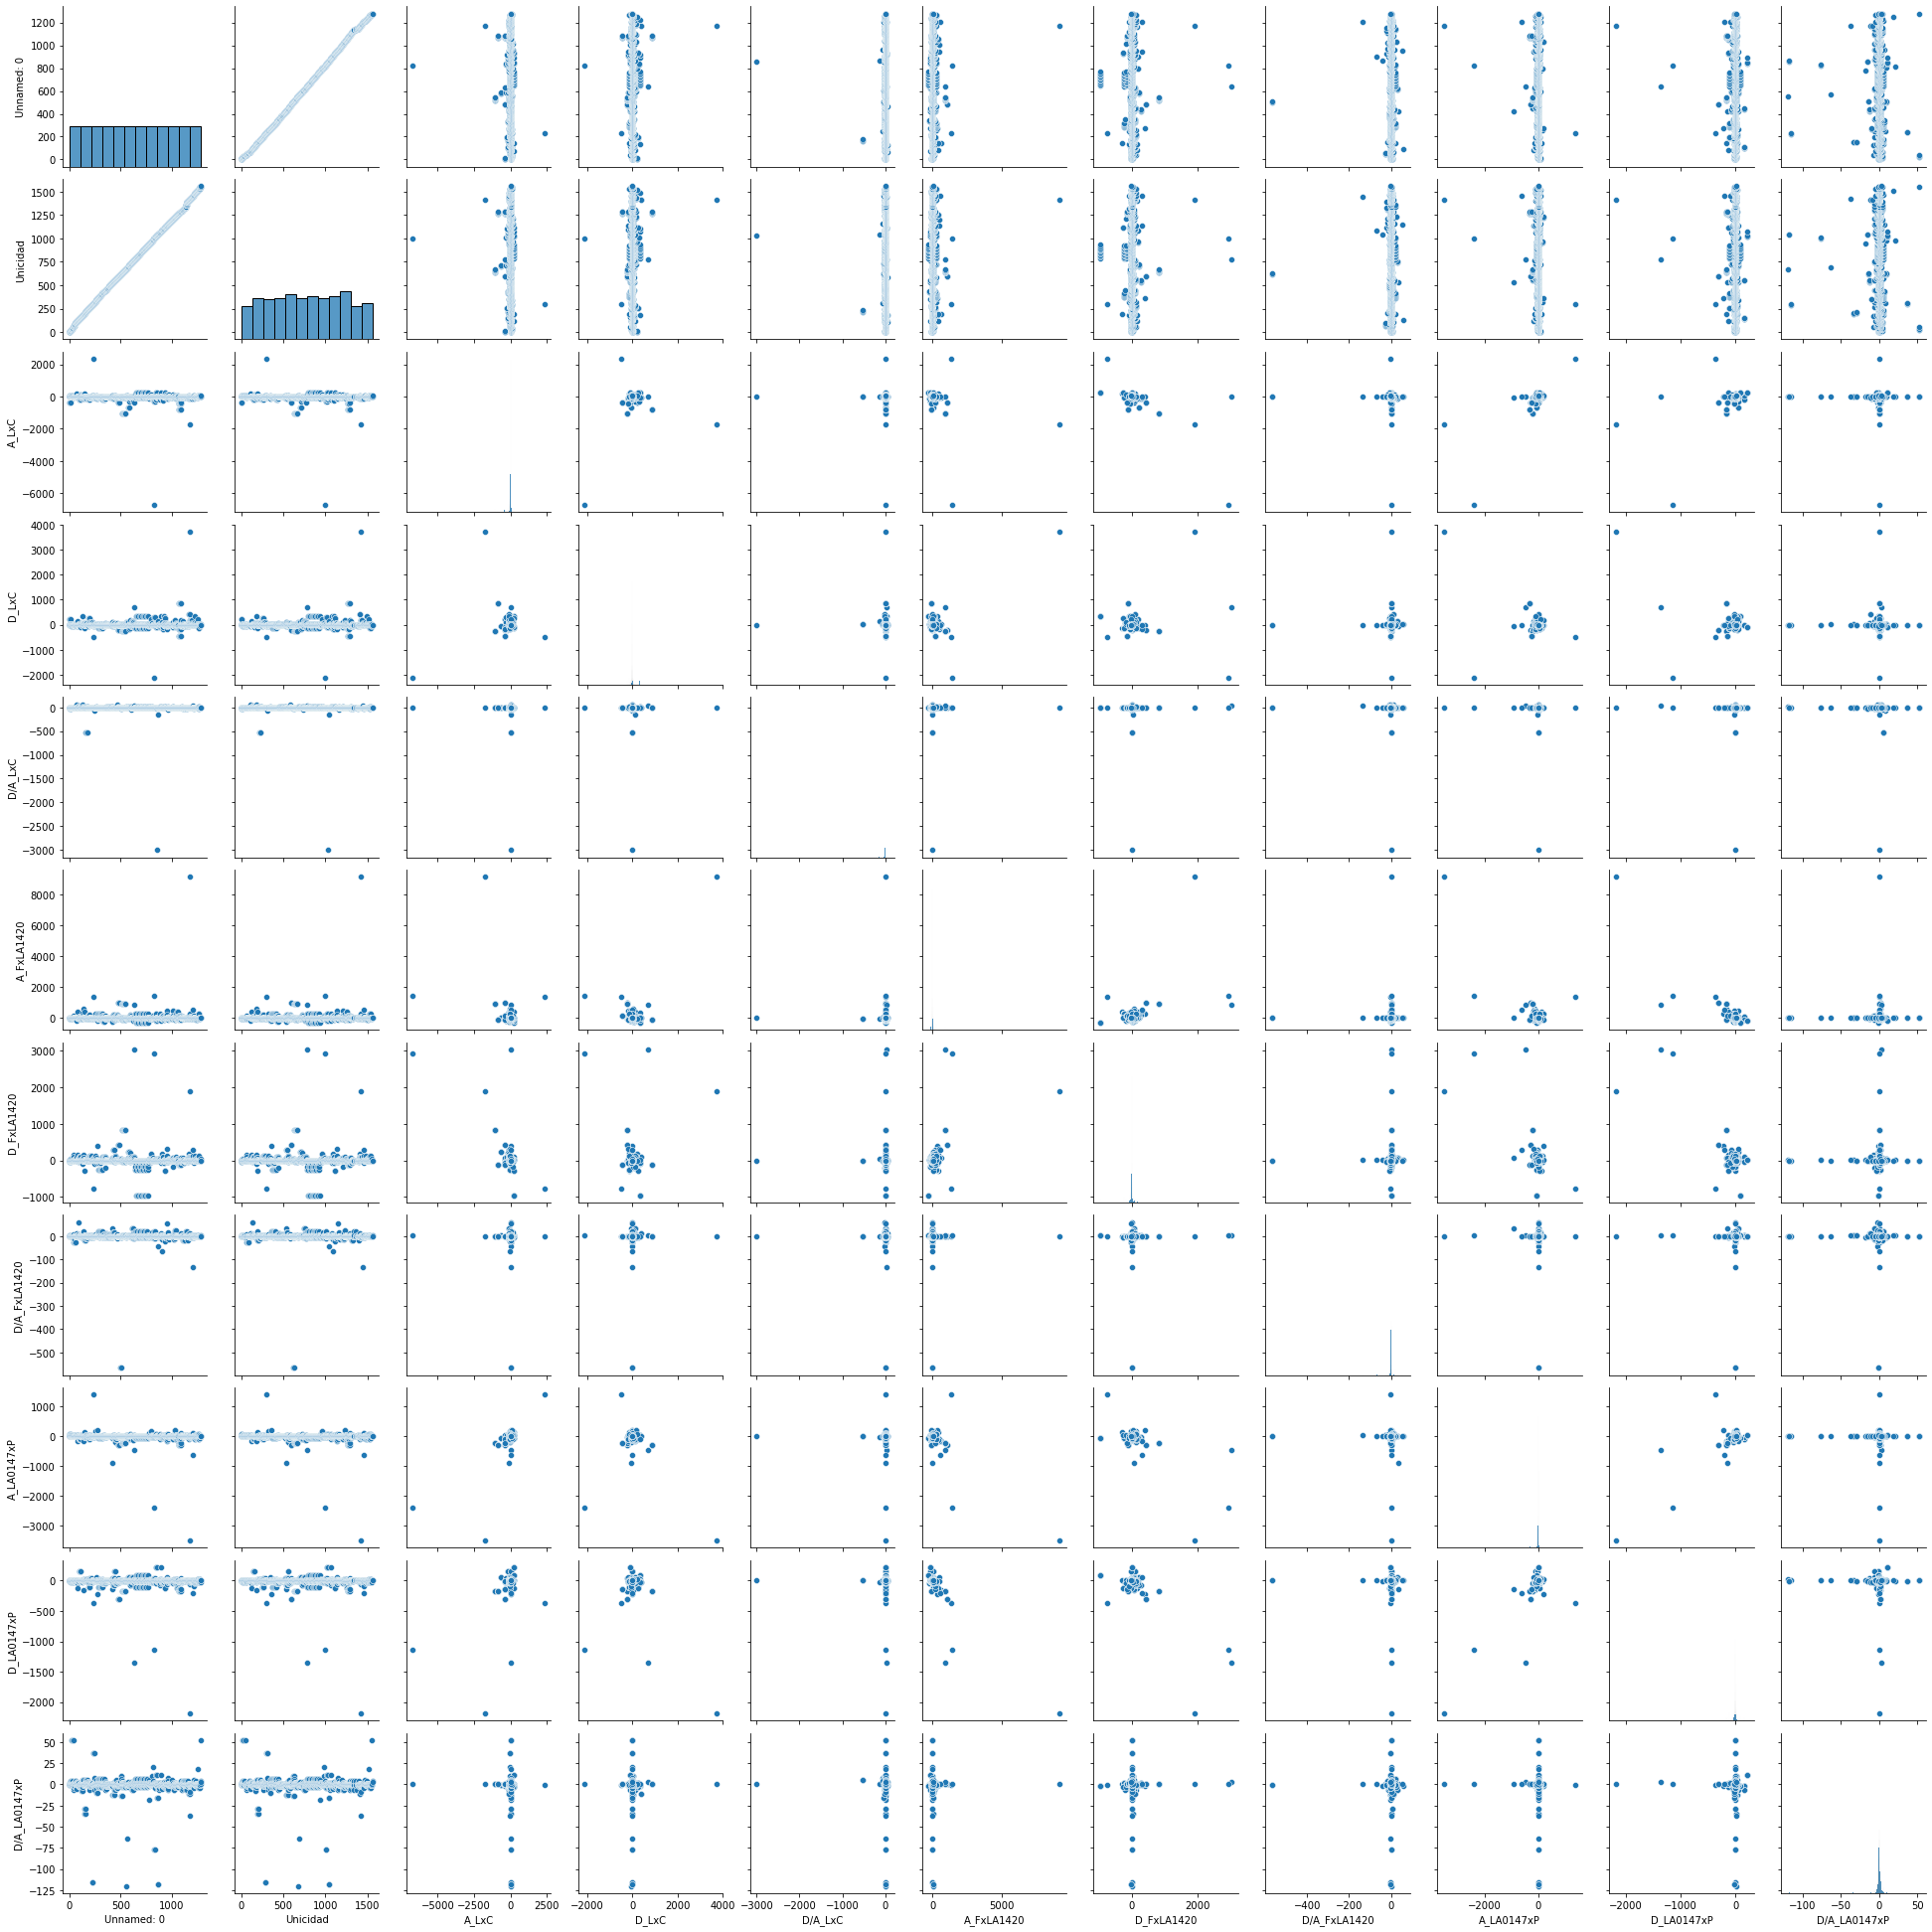

In [89]:
sns.pairplot(t)

<AxesSubplot:ylabel='Density'>

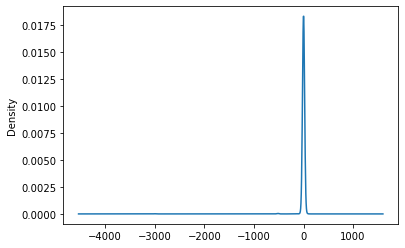

In [91]:
t['D/A_LxC'].plot(kind='kde')

In [92]:
t['D/A_LxC'].quantile([0.1 ,0.17 ,0.25 , 0.5 , 0.75 , 0.82,0.95])

0.10   -3.049990
0.17   -1.289663
0.25   -0.821055
0.50    0.142020
0.75    0.917884
0.82    1.460343
0.95    6.519966
Name: D/A_LxC, dtype: float64

In [93]:
t['D/A_LA0147xP'].quantile([0.1 ,0.17 ,0.25 , 0.5 , 0.75 , 0.82,0.95])

0.10   -2.249997
0.17   -1.262259
0.25   -0.735504
0.50    0.064148
0.75    0.864430
0.82    1.354381
0.95    3.813417
Name: D/A_LA0147xP, dtype: float64

In [100]:
t['D/A_FxLA1420'].quantile([0.1 ,0.15 ,0.25 , 0.5 , 0.75 , 0.78,0.95])

0.10   -1.990687
0.15   -1.160369
0.25   -0.509584
0.50    0.323745
0.75    1.034045
0.78    1.219420
0.95    5.658260
Name: D/A_FxLA1420, dtype: float64

In [ ]:
#bueno, con esta informaci'on, voy a usar el criterio heredado de Pascual...

In [ ]:
#asi que en  otra notebook, voy a ir usando el criterio para asignarle si es dominante, sobredominante,
#resesivo, o sobre resesivo